In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv(r'C:\Users\samyu\Downloads\daily-min-temperatures.csv')
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [8]:
data['Date'] =  pd.to_datetime(data['Date'])

In [9]:
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [10]:
print(f"min date: {data['Date'].min()}, max date: {data['Date'].max()}")
print(f"range: {data['Date'].max()-data['Date'].min()}")

min date: 1981-01-01 00:00:00, max date: 1990-12-31 00:00:00
range: 3651 days 00:00:00


In [14]:
data.sort_values('Date').rolling('1D',on='Date').sum().head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [16]:
temp = data.sort_values('Date').rolling('1D',on='Date').sum()
temp.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


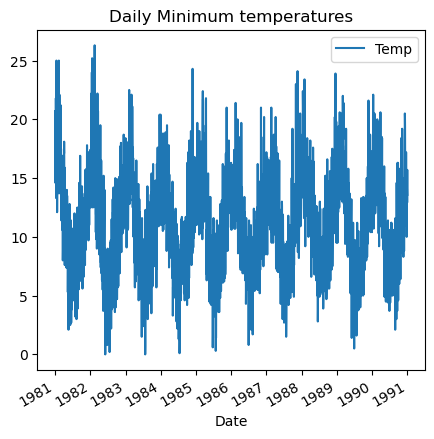

In [19]:
temp.plot(x='Date',y='Temp',title="Daily Minimum temperatures",figsize=(5,5))
plt.show()

In [20]:
df1 = data.set_index('Date').sort_index()
df1

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


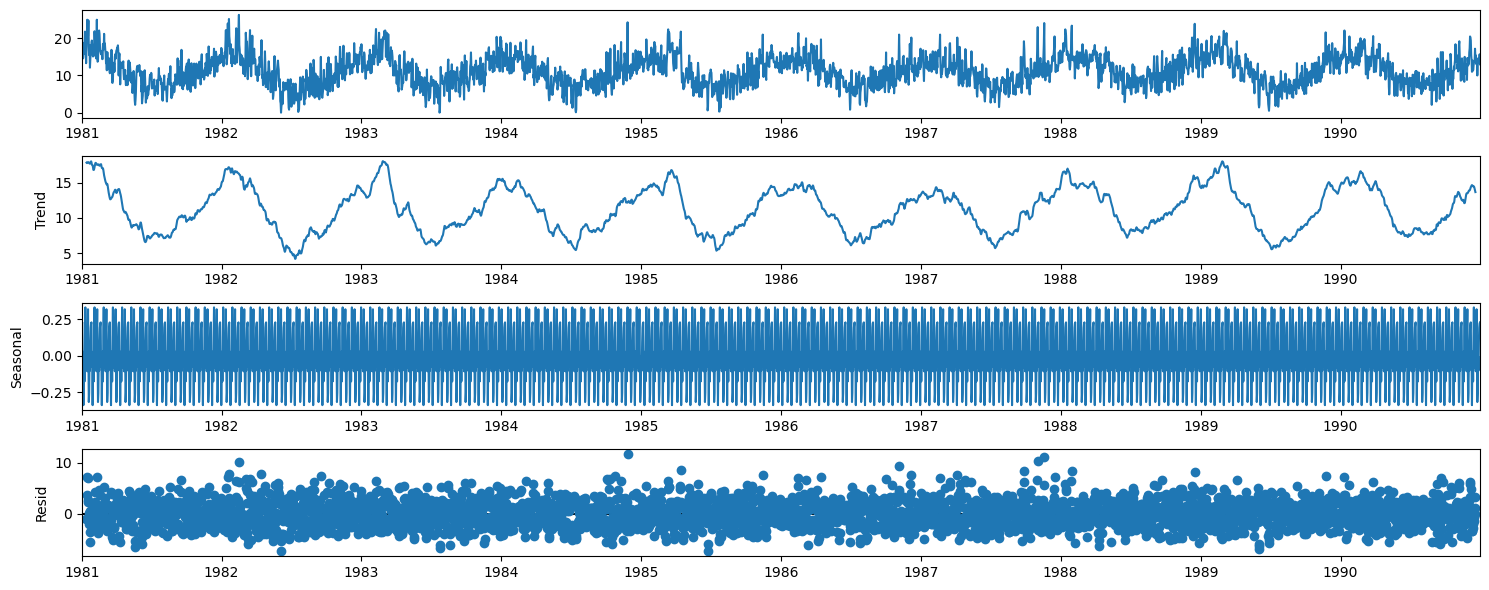

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1,model='additive',period=24)
plt.rc("figure", figsize=(15,6))
result.plot()
plt.show()

In [22]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df1,order=(0,0,1))
model_fit = model.fit()

C:\Users\samyu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samyu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samyu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
next_pred = model_fit.predict()
next_pred = next_pred.iloc[-25:]
df1= df1.iloc[:-25]

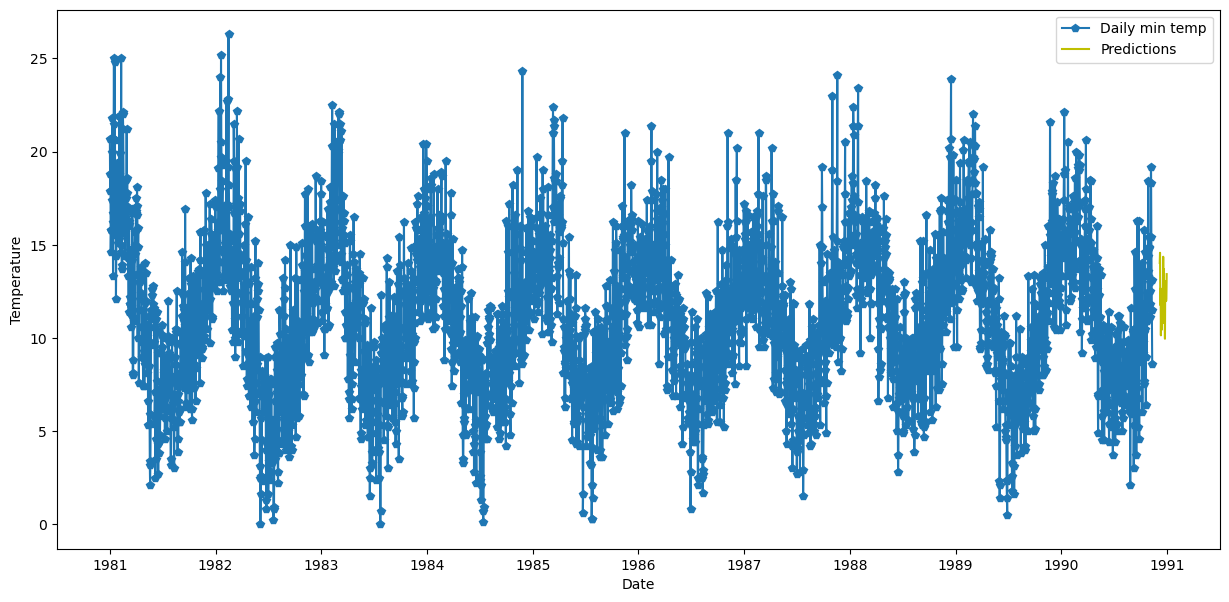

In [28]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

ax.plot(df1['Temp'],'p-',label='Daily min temp')
ax.plot(next_pred,'y-',label='Predictions')
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Temperature")
plt.show()
